In [88]:
from underthesea import word_tokenize, text_normalize

from pyvi import ViTokenizer
from pyvi.ViTokenizer import tokenize
import pandas as pd
import re
import string

import pandas as pd

# Text processing

In [89]:
def clean_text(text):
    text = re.sub(
        r"[\.,\(\)]", " ", text
    )  # thay thế các kí tự đặc biệt bằng khoảng trắng
    text = re.sub(
        r"…", " ", text
    )  # thay thế các kí tự đặc biệt bằng khoảng trắng
    text = re.sub('<.*?>', '', text).strip() # remove html tag
    # Remove special characters
    # text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub('(\s)+', r'\1', text)
    return text

def sentence_segment(text):
    sents = re.split("([.?!])?[\n]+|[.?!] ", text)
    return sents

def word_segment(sent): # chuyển câu thành từ
    sent = tokenize(sent)
    sent = text_normalize(sent)
    return sent

def normalize_text(text):
    listpunctuation = string.punctuation.replace('_', '')
    for i in listpunctuation:
        text = text.replace(i, ' ')
    return text.lower()


PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

def remove_numbers(text_in):
  for ele in text_in.split(): 
    if ele.isdigit():
        text_in = text_in.replace(ele, "@")
  for character in text_in:
    if character.isdigit():
        text_in = text_in.replace(character, "@")
  return text_in


def remove_special_characters(text):
  chars = re.escape(string.punctuation)
  return re.sub(r'['+chars+']', '', text)

 
def preprocess(text_in):  
    text = clean_text(text_in)
    text = remove_special_characters(text)
    text = remove_numbers(text) 
    return text

data_stopwords = pd.read_csv('./stopwords.csv')
list_stopwords = data_stopwords['stopwords'].values.tolist()
def remove_stopword(text):
    text = ' '.join([i for i in text.split() if i not in list_stopwords])
    return text

def process_text(text):
    text = clean_text(text)
    text = remove_special_characters(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = word_segment(text)
    text = normalize_text(text)
    text = remove_stopword(text)
    return text

In [90]:
import re
s = "string. With. Punctuation?"
s = re.sub(r'[^\w\s]','',s)


In [91]:
print(word_tokenize("hôm nay . trời đẹp. lắm", format='text'))

hôm_nay . trời đẹp . lắm


In [92]:
import underthesea
print(process_text("hôm nay… trời đẹp. lắm"))

hôm_nay trời đẹp lắm


# Load Docx

In [93]:
from langchain_core import document_loaders

In [94]:
from langchain_community.document_loaders import Docx2txtLoader

loader = Docx2txtLoader("./BoTTTT-DuthaoNghidinh-Version4.1.DOCX")

data = loader.load()

data

[Document(page_content='21\n\n\n\n178\n\n\n\n\t\t\n\n\t\tCHÍNH PHỦ\n\n\t\t_______\n\n\t\t\n\nDỰ THẢO 4.1\n\nDỰ THẢO 4.1Số:          /2024/NĐ-CP\n\n\t\tCỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM\n\n\t\tĐộc lập - Tự do - Hạnh phúc\n\n\t\t\n\n\t\tHà Nội, ngày      tháng     năm 2024\n\n\n\n\n\nNGHỊ ĐỊNH\n\nQuy định chi tiết một số điều và biện pháp thi hành Luật Viễn thông\n\n\t\t\n\n\t\tCăn cứ Luật Tổ chức Chính phủ ngày 19 tháng 6 năm 2015; Luật sửa đổi, bổ sung một số điều của Luật Tổ chức Chính phủ và Luật Tổ chức chính quyền địa phương ngày 22 tháng 11 năm 2019;\n\n\t\tCăn cứ Luật Viễn thông ngày 24 tháng 11 năm 2023;\n\n\t\tLuật Tần số vô tuyến điện ngày 23 tháng 11 năm 2009 được sửa đổi, bổ sung bởi Luật số 09/2022/QH15 ngày 09 tháng 11 năm 2022;\n\n\t\tCăn cứ Luật Phí và lệ phí ngày 25 tháng 11 năm 2015;\n\n\t\tCăn cứ Luật Tiêu chuẩn và quy chuẩn kỹ thuật ngày 29 tháng 6 năm 2006;\n\n\t\tCăn cứ Luật Chất lượng sản phẩm, hàng hóa ngày 21 tháng 11 năm 2007;\n\n\t\tTheo đề nghị của Bộ trưởng

In [95]:
df = data[0].page_content
df

'21\n\n\n\n178\n\n\n\n\t\t\n\n\t\tCHÍNH PHỦ\n\n\t\t_______\n\n\t\t\n\nDỰ THẢO 4.1\n\nDỰ THẢO 4.1Số:          /2024/NĐ-CP\n\n\t\tCỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM\n\n\t\tĐộc lập - Tự do - Hạnh phúc\n\n\t\t\n\n\t\tHà Nội, ngày      tháng     năm 2024\n\n\n\n\n\nNGHỊ ĐỊNH\n\nQuy định chi tiết một số điều và biện pháp thi hành Luật Viễn thông\n\n\t\t\n\n\t\tCăn cứ Luật Tổ chức Chính phủ ngày 19 tháng 6 năm 2015; Luật sửa đổi, bổ sung một số điều của Luật Tổ chức Chính phủ và Luật Tổ chức chính quyền địa phương ngày 22 tháng 11 năm 2019;\n\n\t\tCăn cứ Luật Viễn thông ngày 24 tháng 11 năm 2023;\n\n\t\tLuật Tần số vô tuyến điện ngày 23 tháng 11 năm 2009 được sửa đổi, bổ sung bởi Luật số 09/2022/QH15 ngày 09 tháng 11 năm 2022;\n\n\t\tCăn cứ Luật Phí và lệ phí ngày 25 tháng 11 năm 2015;\n\n\t\tCăn cứ Luật Tiêu chuẩn và quy chuẩn kỹ thuật ngày 29 tháng 6 năm 2006;\n\n\t\tCăn cứ Luật Chất lượng sản phẩm, hàng hóa ngày 21 tháng 11 năm 2007;\n\n\t\tTheo đề nghị của Bộ trưởng Bộ Thông tin và Truyền

In [96]:
df = process_text(df)
df

'chính_phủ dự_thảo dự_thảo số nđcp cộng hòa xã_hội chủ_nghĩa việt nam độc_lập tự_do hạnh_phúc hà_nội nghị_định quy_định chi_tiết biện_pháp thi_hành luật viễn_thông căn_cứ luật tổ_chức chính_phủ luật sửa_đổi bổ_sung luật tổ_chức chính_phủ luật tổ_chức chính_quyền địa_phương căn_cứ luật viễn_thông luật tần_số vô_tuyến_điện sửa_đổi bổ_sung luật số qh căn_cứ luật phí lệ_phí căn_cứ luật tiêu_chuẩn quy_chuẩn kỹ_thuật căn_cứ luật chất_lượng sản_phẩm hàng_hóa đề_nghị bộ_trưởng thông_tin truyền_thông chính_phủ ban_hành nghị_định quy_định chi_tiết biện_pháp thi_hành luật viễn_thông chương_i quy_định phạm_vi điều_chỉnh nghị_định quy_định chi_tiết khoản điều_khoản điểm h_k m khoản điểm d khoản điều_khoản điều_khoản điều_khoản điều_khoản điểm b khoản điều_khoản điểm d khoản khoản điểm h khoản khoản điều_khoản điểm b khoản điểm b khoản điểm b khoản điều_khoản điều_khoản điều_khoản điều_khoản điều_khoản luật viễn_thông hoạt_động viễn_thông a kinh_doanh dịch_vụ viễn_thông b giấy_phép viễn_thông c quy_

In [97]:
# Import WordCloud library
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Word cloud

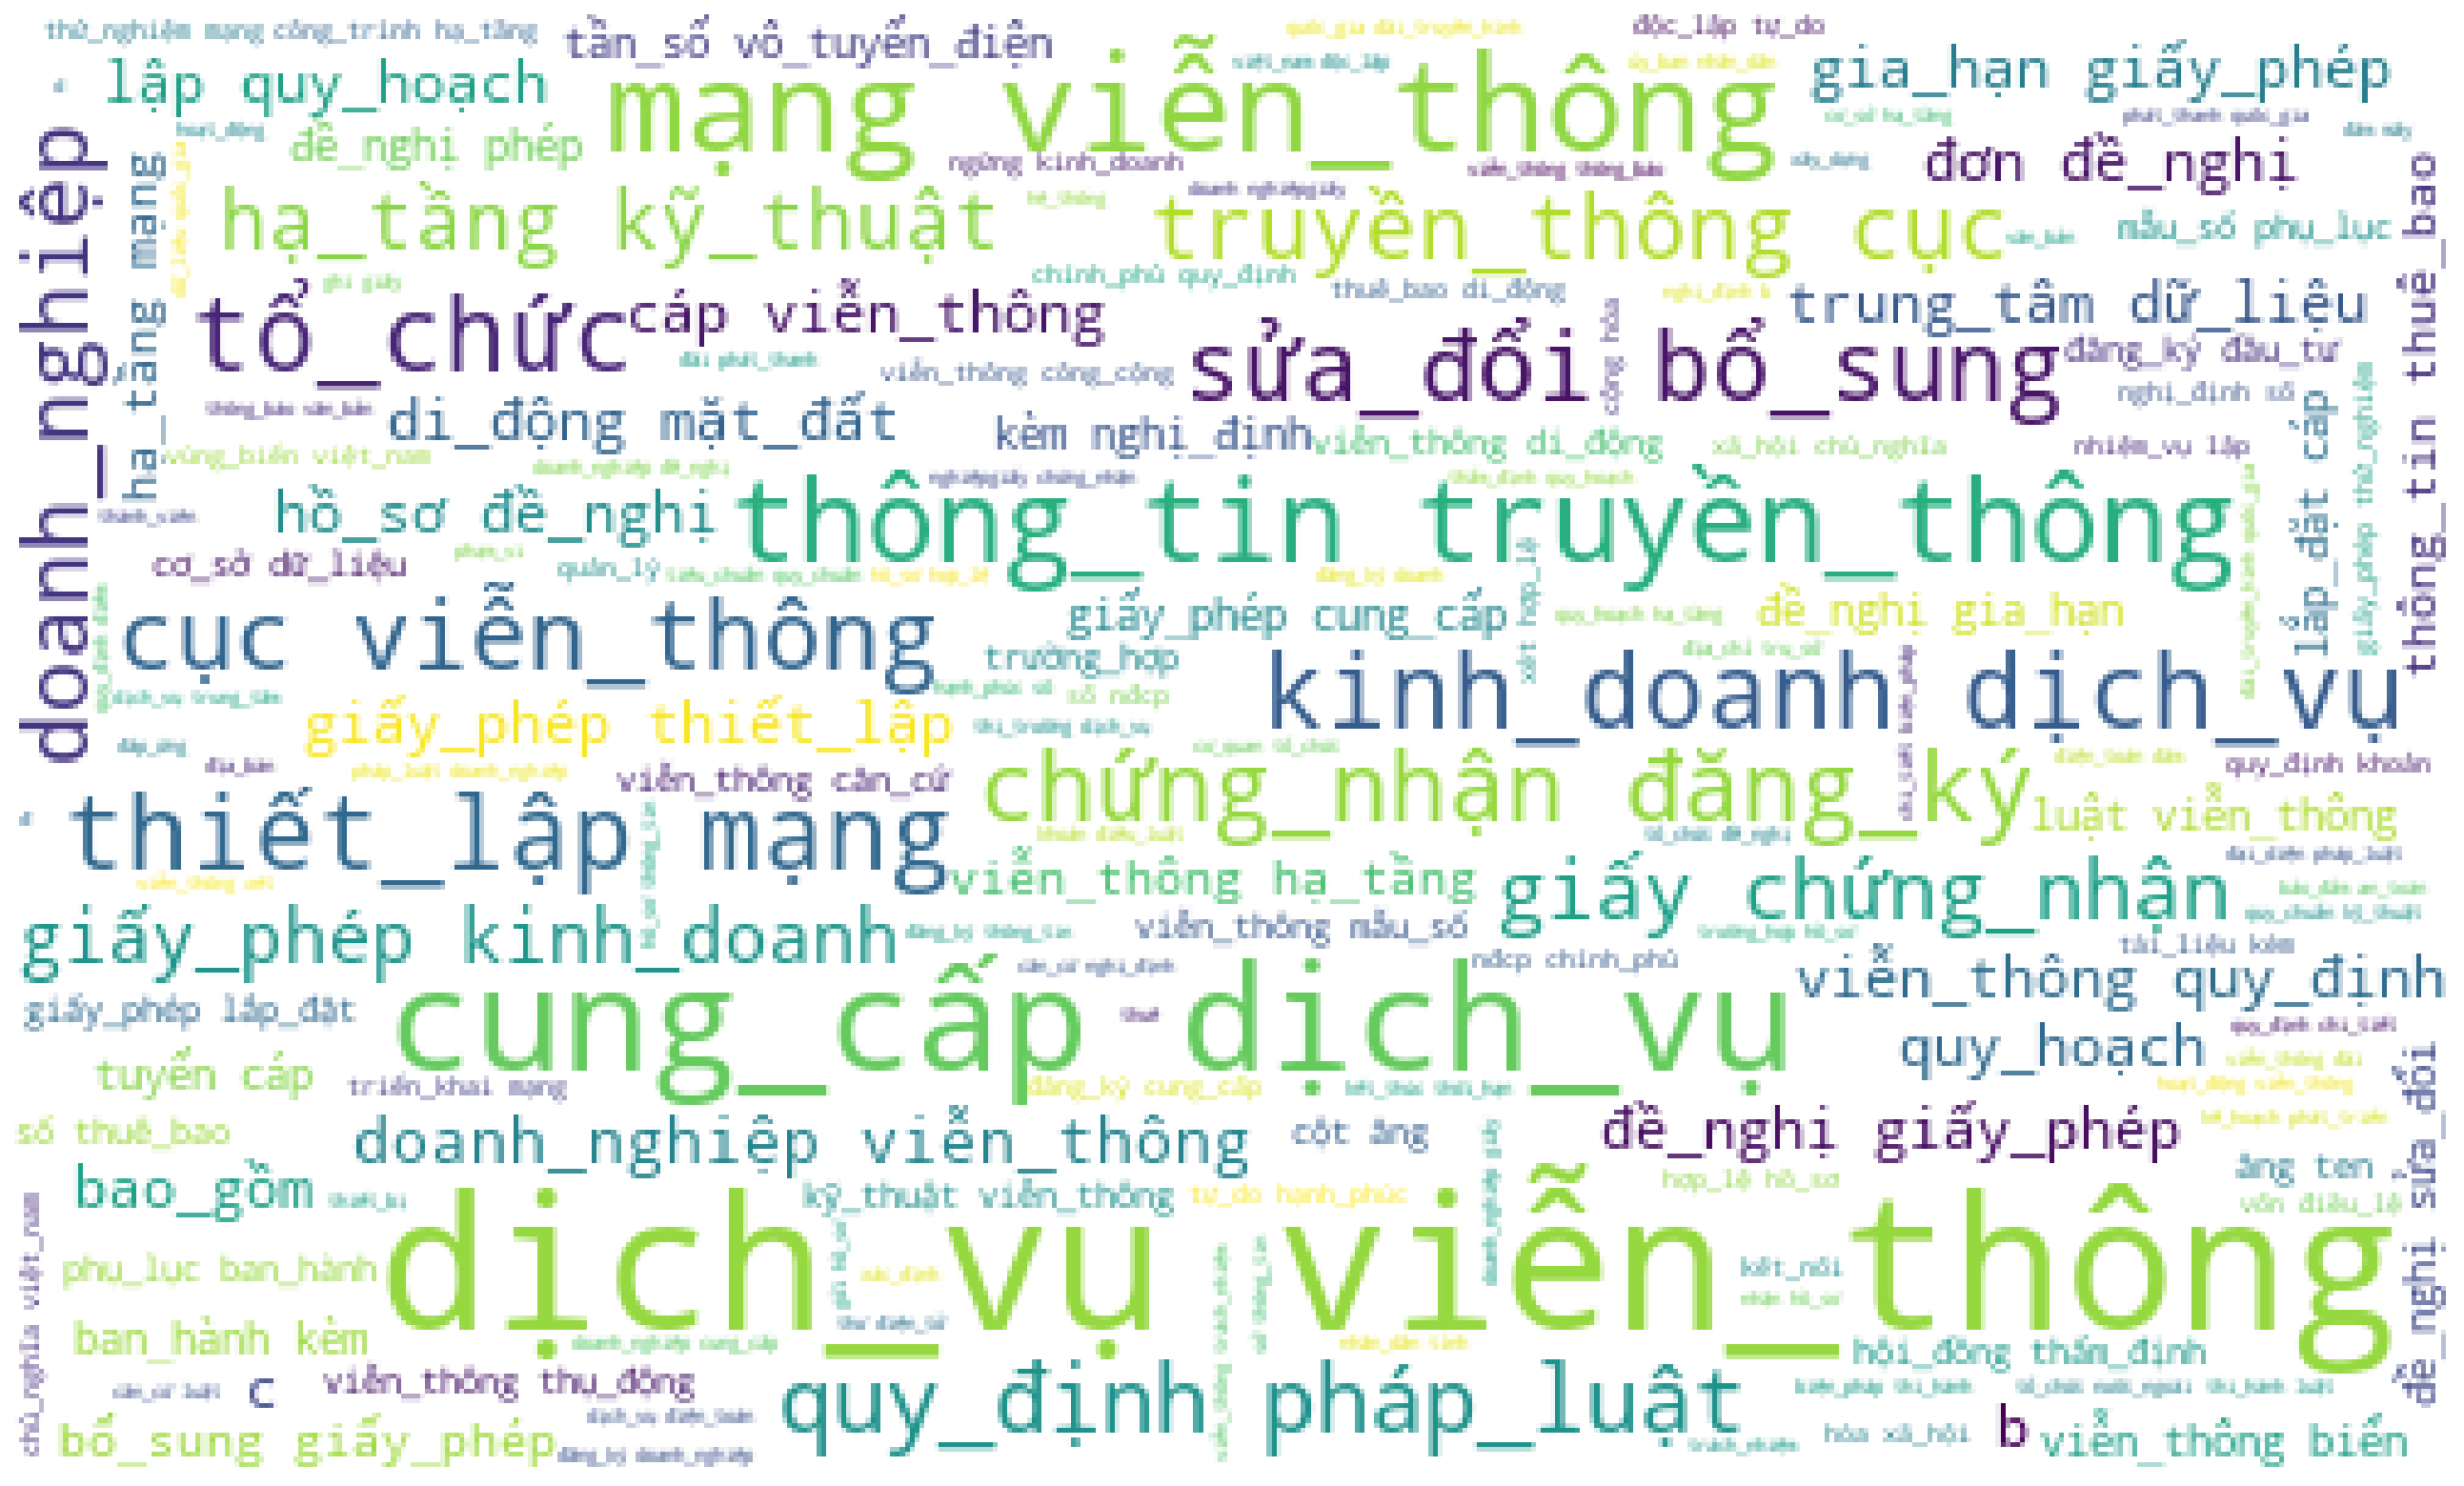

In [98]:
texto = df

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Word Frequence

In [99]:
from nltk.probability import FreqDist

In [100]:
fdist = FreqDist(word.lower() for word in word_tokenize(df))


In [101]:
fdist.most_common(20)

[('viễn_thông', 1529),
 ('dịch_vụ', 850),
 ('giấy_phép', 591),
 ('doanh_nghiệp', 479),
 ('thông_tin', 470),
 ('quy_định', 425),
 ('cung_cấp', 388),
 ('quy_hoạch', 316),
 ('tổ_chức', 295),
 ('hồ_sơ', 277),
 ('số', 264),
 ('đề_nghị', 262),
 ('đăng_ký', 233),
 ('truyền_thông', 220),
 ('pháp_luật', 199),
 ('kinh_doanh', 191),
 ('thuê_bao', 171),
 ('việt_nam', 170),
 ('bổ_sung', 160),
 ('b', 160)]

In [103]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [105]:
df

'chính_phủ dự_thảo dự_thảo số nđcp cộng hòa xã_hội chủ_nghĩa việt nam độc_lập tự_do hạnh_phúc hà_nội nghị_định quy_định chi_tiết biện_pháp thi_hành luật viễn_thông căn_cứ luật tổ_chức chính_phủ luật sửa_đổi bổ_sung luật tổ_chức chính_phủ luật tổ_chức chính_quyền địa_phương căn_cứ luật viễn_thông luật tần_số vô_tuyến_điện sửa_đổi bổ_sung luật số qh căn_cứ luật phí lệ_phí căn_cứ luật tiêu_chuẩn quy_chuẩn kỹ_thuật căn_cứ luật chất_lượng sản_phẩm hàng_hóa đề_nghị bộ_trưởng thông_tin truyền_thông chính_phủ ban_hành nghị_định quy_định chi_tiết biện_pháp thi_hành luật viễn_thông chương_i quy_định phạm_vi điều_chỉnh nghị_định quy_định chi_tiết khoản điều_khoản điểm h_k m khoản điểm d khoản điều_khoản điều_khoản điều_khoản điều_khoản điểm b khoản điều_khoản điểm d khoản khoản điểm h khoản khoản điều_khoản điểm b khoản điểm b khoản điểm b khoản điều_khoản điều_khoản điều_khoản điều_khoản điều_khoản luật viễn_thông hoạt_động viễn_thông a kinh_doanh dịch_vụ viễn_thông b giấy_phép viễn_thông c quy_

In [112]:
dt = data[0].page_content

In [113]:
from underthesea import sent_tokenize

# TF-IDF transformer

In [119]:
da = sent_tokenize(dt)
da = [process_text(i) for i in da]
da = [i for i in da if i != '']
da

['chính_phủ dự_thảo dự_thảo số nđcp cộng hòa xã_hội chủ_nghĩa việt nam độc_lập tự_do hạnh_phúc hà_nội nghị_định quy_định chi_tiết biện_pháp thi_hành luật viễn_thông căn_cứ luật tổ_chức chính_phủ luật sửa_đổi bổ_sung luật tổ_chức chính_phủ luật tổ_chức chính_quyền địa_phương căn_cứ luật viễn_thông luật tần_số vô_tuyến_điện sửa_đổi bổ_sung luật số qh căn_cứ luật phí lệ_phí căn_cứ luật tiêu_chuẩn quy_chuẩn kỹ_thuật căn_cứ luật chất_lượng sản_phẩm hàng_hóa đề_nghị bộ_trưởng thông_tin truyền_thông chính_phủ ban_hành nghị_định quy_định chi_tiết biện_pháp thi_hành luật viễn_thông',
 'chương_i quy_định phạm_vi điều_chỉnh',
 'nghị_định quy_định chi_tiết khoản điều_khoản điểm h_k m khoản điểm d khoản điều_khoản điều_khoản điều_khoản điều_khoản điểm b khoản điều_khoản điểm d khoản khoản điểm h khoản khoản điều_khoản điểm b khoản điểm b khoản điểm b khoản điều_khoản điều_khoản điều_khoản điều_khoản điều_khoản luật viễn_thông hoạt_động viễn_thông a kinh_doanh dịch_vụ viễn_thông b giấy_phép viễn_thô

In [121]:
cv=CountVectorizer()

# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(da)

In [122]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

# print idf values
tfidf_transformer.idf_

array([7.4853983 , 7.0799332 , 7.0799332 , ..., 7.4853983 , 5.61359613,
       7.0799332 ])

In [125]:
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names_out(),columns=["idf_weights"])
df_idf.sort_values(by=['idf_weights'])

,idf_weights
viễn_thông,1.652051
dịch_vụ,2.214966
thông_tin,2.289668
doanh_nghiệp,2.312077
quy_định,2.400893
...,...
nội_bộ,7.485398
otp,7.485398
pcn,7.485398
phiên_họp,7.485398


# Result TF-IDF transformer

In [128]:
count_vector=cv.transform(da)
tf_idf_vector=tfidf_transformer.transform(count_vector)
feature_names = cv.get_feature_names_out()

#get tfidf vector for first document
first_document_vector=tf_idf_vector[0]

#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
luật,0.743275
căn_cứ,0.317607
chính_phủ,0.254086
dự_thảo,0.179250
biện_pháp,0.127043
...,...
khẩn_cấp,0.000000
khảo_sát,0.000000
khảo,0.000000
khản,0.000000


# TF-IDF Vectorizer

In [129]:
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(da)

# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]

In [131]:
df1 = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])
df1.sort_values(by=["tfidf"],ascending=False)

,tfidf
luật,0.743275
căn_cứ,0.317607
chính_phủ,0.254086
dự_thảo,0.179250
biện_pháp,0.127043
...,...
khẩn_cấp,0.000000
khảo_sát,0.000000
khảo,0.000000
khản,0.000000


# Result TF-IDF Vectorizer

In [132]:
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

# just send in all your docs here
fitted_vectorizer=tfidf_vectorizer.fit(da)
tfidf_vectorizer_vectors=fitted_vectorizer.transform(da)

# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]
df2 = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])
df2.sort_values(by=["tfidf"],ascending=False)

,tfidf
luật,0.743275
căn_cứ,0.317607
chính_phủ,0.254086
dự_thảo,0.179250
biện_pháp,0.127043
...,...
khẩn_cấp,0.000000
khảo_sát,0.000000
khảo,0.000000
khản,0.000000
